In [2]:
import pandas as pd
import numpy as np

car_cols = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
cars = pd.read_csv(r'imports-85.data', names=car_cols)
cars.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
#numeric, continuous columns can be used as features. price column will be target column.

cont_cols = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
cont_cols = cars[cont_cols]
cont_cols.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cont_cols = cont_cols.replace('?', np.nan)
cont_cols.dtypes
cont_cols.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cont_cols = cont_cols.astype('float')
cont_cols.dtypes
cont_cols.head(6)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


In [6]:
cont_cols.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
cont_cols = cont_cols.dropna(subset=['price'])
cont_cols.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
cont_cols = cont_cols.fillna(cont_cols.mean())
cont_cols.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
cont_cols.head(6)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
5,122.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


In [10]:
price_col = cont_cols['price']
cont_cols = ((cont_cols - cont_cols.min()/cont_cols.max() - cont_cols.min()))
cont_cols['price'] = price_col

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor() #default
    np.random.seed(1)
    shuffled_in = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_in)
    #divide
    last_row = int(len(random_df) / 2)
    #two halves, holdout
    train_data = random_df.iloc[0:last_row]
    test_data = random_df.iloc[last_row:]
    
    knn.fit(train_data[[train_col]], train_data[target_col])
    predicted_labels = knn.predict(test_data[[train_col]])
    #print(predicted_labels)
    
    rmse = mean_squared_error(test_data[target_col], predicted_labels)**(1/2)
    return rmse

rmse_results = {} #dict for results
#go through each column in df except target
train_cols = cont_cols.columns.drop('price')

for col in train_cols:
    rmse_values = knn_train_test(col,'price',cont_cols)
    rmse_results[col] = rmse_values

rmse_series = pd.Series(rmse_results)
rmse_series.sort_values()

engine-size          3271.449938
horsepower           4048.437725
curb-weight          4445.141920
highway-mpg          4643.046278
city-mpg             4759.289572
width                4772.459149
length               5428.810101
wheel-base           5460.851458
compression-ratio    6610.812153
bore                 6795.388312
normalized-losses    7339.675755
peak-rpm             7649.170564
stroke               7954.301034
height               8073.119759
dtype: float64

In [12]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffled_in = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_in)
    #divide
    last_row = int(len(random_df) / 2)
    #two halves, holdout
    train_data = random_df.iloc[0:last_row]
    test_data = random_df.iloc[last_row:]
    
    k_vals = [1,3,5,7,9]
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_data[[train_col]], train_data[target_col])
        predicted_labels = knn.predict(test_data[[train_col]])
        
        rmse = mean_squared_error(test_data[target_col], predicted_labels)**(1/2)
        k_rmse[k] = rmse
    return k_rmse

rmse_results = {} #dict for results
#go through each column in df except target
train_cols = cont_cols.columns.drop('price')

for col in train_cols:
    rmse_values = knn_train_test(col,'price',cont_cols)
    rmse_results[col] = rmse_values

rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6795.388311535586,
  7: 6896.559499627726,
  9: 6882.822815090022},
 'city-mpg': {1: 5863.190943471308,
  3: 4601.811508592682,
  5: 4759.289572161288,
  7: 5218.132414178214,
  9: 5445.184074780081},
 'compression-ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4445.141920375235,
  7: 4330.608104418053,
  9: 4632.92525121302},
 'engine-size': {1: 3258.4861059962027,
  3: 2951.5259704863593,
  5: 3271.449938331611,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8751.160007407449,
  3: 8121.165102604576,
  5: 8073.1197593196175,
  7: 7693.302663098179,
  9: 7776.396862418894},
 'highway-mpg': {1: 6025.594966720739,
  3: 4671.390389789466,
  5: 4643.046277675214,
  7: 4792.485755925797,
  9: 5227.337381566373},
 'horsepower': {1: 4170.054848037801,
  3: 4020.1054510

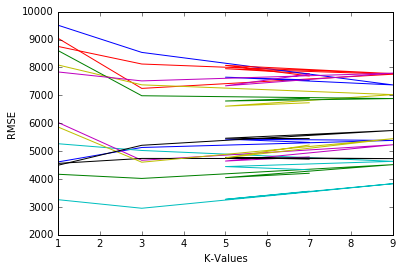

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

for k,v in rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.xlabel("K-Value")
    plt.ylabel("RMSE")
for k,v in rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel("K-Values")
    plt.ylabel("RMSE")

In [14]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffled_in = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_in)
    #divide
    last_row = int(len(random_df) / 2)
    #two halves, holdout
    train_data = random_df.iloc[0:last_row]
    test_data = random_df.iloc[last_row:]
    
    k_vals = [1,3,5,7,9]
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_data[[train_col]], train_data[target_col])
        predicted_labels = knn.predict(test_data[[train_col]])
    
        rmse = mean_squared_error(test_data[target_col], predicted_labels)**(1/2)
        k_rmse[k] = rmse
    return k_rmse

rmse_results = {} #dict for results
#go through each column in df except target
train_cols = cont_cols.columns.drop('price')

for col in train_cols:
    rmse_values = knn_train_test(col,'price',cont_cols)
    rmse_results[col] = rmse_values

rmse_results

col_feats = {} #average rmse of reiterated k-values for each attribute, or feature
for k, v in rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    col_feats[k] = avg_rmse

col_feats_avg = pd.Series(col_feats)
col_sorted = col_feats_avg.sort_values() #sorted values reflects 'best' features by having lowest errors ascending
print(col_sorted)
sorted_index = col_sorted.index
print(sorted_index)

engine-size          3375.274641
horsepower           4191.699237
width                4703.119223
curb-weight          4739.056704
highway-mpg          5071.970954
length               5173.087449
city-mpg             5177.521703
wheel-base           5269.898315
compression-ratio    7166.073599
bore                 7232.319720
normalized-losses    7649.281809
stroke               7955.585214
height               8083.028879
peak-rpm             8124.022815
dtype: float64
Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'length', 'city-mpg', 'wheel-base', 'compression-ratio', 'bore',
       'normalized-losses', 'stroke', 'height', 'peak-rpm'],
      dtype='object')


In [15]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffled_in = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_in)
    #divide
    last_row = int(len(random_df) / 2)
    #two halves, holdout
    train_data = random_df.iloc[0:last_row]
    test_data = random_df.iloc[last_row:]
    
    k_vals = [5] #default k-value
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_data[train_col], train_data[target_col])
        predicted_labels = knn.predict(test_data[train_col])
    
        rmse = mean_squared_error(test_data[target_col], predicted_labels)**(1/2)
        k_rmse['K-Value: {}'.format(k)] = rmse
    return k_rmse

rmse_results = {}
for best_features in range(2, 6):
    rmse_results['{} best features'.format(best_features)] = knn_train_test(
        sorted_index[:best_features], 'price', cont_cols)
rmse_results

{'2 best features': {'K-Value: 5': 2937.5358109803665},
 '3 best features': {'K-Value: 5': 2901.007254846714},
 '4 best features': {'K-Value: 5': 3864.067381953533},
 '5 best features': {'K-Value: 5': 3870.6838798617723}}

In [16]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffled_in = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_in)
    #divide
    last_row = int(len(random_df) / 2)
    #two halves, holdout
    train_data = random_df.iloc[0:last_row]
    test_data = random_df.iloc[last_row:]
    
    k_vals = [x for x in range(1, 26)]
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_data[train_col], train_data[target_col])
        predicted_labels = knn.predict(test_data[train_col])
    
        rmse = mean_squared_error(test_data[target_col], predicted_labels)**(1/2)
        k_rmse[k] = rmse
    return k_rmse

rmse_results = {}
for best_features in range(2, 5):
    rmse_results['{} best features'.format(best_features)] = knn_train_test(
        sorted_index[:best_features], 'price', cont_cols
    )
rmse_results

{'2 best features': {1: 2832.6762159757077,
  2: 2592.760534757126,
  3: 2620.327691572396,
  4: 2845.3601081061743,
  5: 2937.5358109803665,
  6: 3162.7465130445685,
  7: 3295.7806528253186,
  8: 3580.3376319325566,
  9: 3844.44037715117,
  10: 4066.955641740046,
  11: 4162.831387739917,
  12: 4250.9953344770765,
  13: 4288.279719198008,
  14: 4318.677524353425,
  15: 4384.634184404111,
  16: 4477.339380724929,
  17: 4542.7101905616355,
  18: 4674.217738293738,
  19: 4695.824514748894,
  20: 4684.844437694387,
  21: 4744.078137218994,
  22: 4779.969895724662,
  23: 4826.869687492047,
  24: 4881.349005863175,
  25: 4963.926213279482},
 '3 best features': {1: 2861.158731550683,
  2: 2644.428153665928,
  3: 2681.7457878865184,
  4: 2722.280458854013,
  5: 2901.007254846714,
  6: 3079.0995987640463,
  7: 3210.5192759138426,
  8: 3485.8385181559474,
  9: 3782.798641745253,
  10: 4029.356670465123,
  11: 4133.471835231293,
  12: 4225.481801502254,
  13: 4232.577904328598,
  14: 4309.0412427

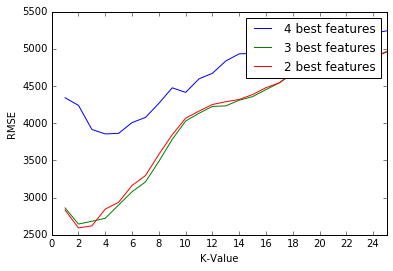

In [17]:
for k, v in rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label='{}'.format(k))
plt.xlabel('K-Value')
plt.ylabel('RMSE')
ticks_increment = np.arange(0, 26, 2)
plt.xticks(ticks_increment)
plt.legend()